Import python libraries for data import and examination

In [255]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Download csv file with data

In [256]:
import requests

url = "https://qubeshub.org/publications/1220/serve/1/3861?el=1&download=1"

r = requests.get(url)
filename = r.headers["Content-Disposition"].split('"')[1]

with open(filename, "wb") as f_out:
    print(f"Downloading {filename}")
    f_out.write(r.content)

In [257]:
df = pd.read_csv('Elephant Morphometrics and Tusk Size-originaldata-3861.csv')

In [258]:
print(df.head())
df.shape
df.isnull().sum()

  Years of sample collection Elephant ID Sex  Estimated Age (years)  \
0                    1966-68          12   f                  0.080   
1                    1966-68          34   f                  0.080   
2                    1966-68         162   f                  0.083   
3                    1966-68         292   f                  0.083   
4                    1966-68          11   f                  0.250   

   shoulder Height in  cm  Tusk Length in cm  Tusk Circumference   in cm  
0                   102.0                NaN                         NaN  
1                    89.0                NaN                         NaN  
2                    89.0                NaN                         NaN  
3                    92.0                NaN                         NaN  
4                   133.0                NaN                         NaN  


Years of sample collection      0
Elephant ID                     0
Sex                             0
Estimated Age (years)           3
shoulder Height in  cm          1
Tusk Length in cm             180
Tusk Circumference   in cm    163
dtype: int64

In [259]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Years of sample collection  777 non-null    object 
 1   Elephant ID                 777 non-null    object 
 2   Sex                         777 non-null    object 
 3   Estimated Age (years)       774 non-null    float64
 4   shoulder Height in  cm      776 non-null    float64
 5   Tusk Length in cm           597 non-null    float64
 6   Tusk Circumference   in cm  614 non-null    float64
dtypes: float64(4), object(3)
memory usage: 42.6+ KB


Index(['Years of sample collection', 'Elephant ID', 'Sex',
       'Estimated Age (years)', 'shoulder Height in  cm', 'Tusk Length in cm',
       'Tusk Circumference   in cm'],
      dtype='object')

In [260]:
df.describe() # examine data before drop NaN

,Estimated Age (years),shoulder Height in cm,Tusk Length in cm,Tusk Circumference in cm
count,774.000000,776.000000,597.000000,614.000000
mean,15.049391,210.178673,91.591962,21.006352
std,12.281982,49.337612,38.782159,7.118821
min,0.080000,89.000000,22.500000,8.000000
25%,4.500000,177.000000,60.946600,16.000000
50%,12.000000,220.000000,88.000000,20.000000
75%,23.000000,244.000000,116.750000,25.000000
max,55.000000,340.000000,234.000000,48.000000


In [261]:
df.dtypes

Years of sample collection     object
Elephant ID                    object
Sex                            object
Estimated Age (years)         float64
shoulder Height in  cm        float64
Tusk Length in cm             float64
Tusk Circumference   in cm    float64
dtype: object

In [262]:
df.columns = ['Year_of data_collection', 'ID', 'gender', 'age', 'shoulder_height_in_cm', 'tusk_length_in_cm', 'tusk_circumference_in_cm']



In [263]:
## This code drops NaN rows

In [264]:
df['tusk_length_in_cm'].replace(0, np.nan, inplace=True)
df['age'].replace(0, np.nan, inplace=True)
df['shoulder_height_in_cm'].replace(0, np.nan, inplace=True)
df['tusk_circumference_in_cm'].replace(0, np.nan, inplace=True)

df = df.dropna()
df.shape

print(df.shape)

(593, 7)


## This code replaces NaN with the mean of the column

In [265]:
#df['tusk_length_in_cm'].fillna(df['tusk_length_in_cm'].mean(), inplace=True)
#df['age'].fillna(df['age'].mean(), inplace=True)
#df['shoulder_height_in_cm'].fillna(df['shoulder_height_in_cm'].mean(), inplace=True)
#df['tusk_circumference_in_cm'].fillna(df['tusk_circumference_in_cm'].mean(), inplace=True)

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593 entries, 15 to 776
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year_of data_collection   593 non-null    object 
 1   ID                        593 non-null    object 
 2   gender                    593 non-null    object 
 3   age                       593 non-null    float64
 4   shoulder_height_in_cm     593 non-null    float64
 5   tusk_length_in_cm         593 non-null    float64
 6   tusk_circumference_in_cm  593 non-null    float64
dtypes: float64(4), object(3)
memory usage: 37.1+ KB


In [267]:
df.describe() # examine data after drop NaN

,age,shoulder_height_in_cm,tusk_length_in_cm,tusk_circumference_in_cm
count,593.000000,593.000000,593.000000,593.000000
mean,16.166526,220.659359,91.815195,20.717707
std,11.105557,37.624011,38.793294,6.798112
min,2.000000,127.000000,22.500000,8.000000
25%,7.000000,191.000000,61.000000,16.000000
50%,14.500000,226.000000,88.600000,20.000000
75%,24.000000,245.000000,117.000000,24.000000
max,52.500000,330.000000,234.000000,48.000000


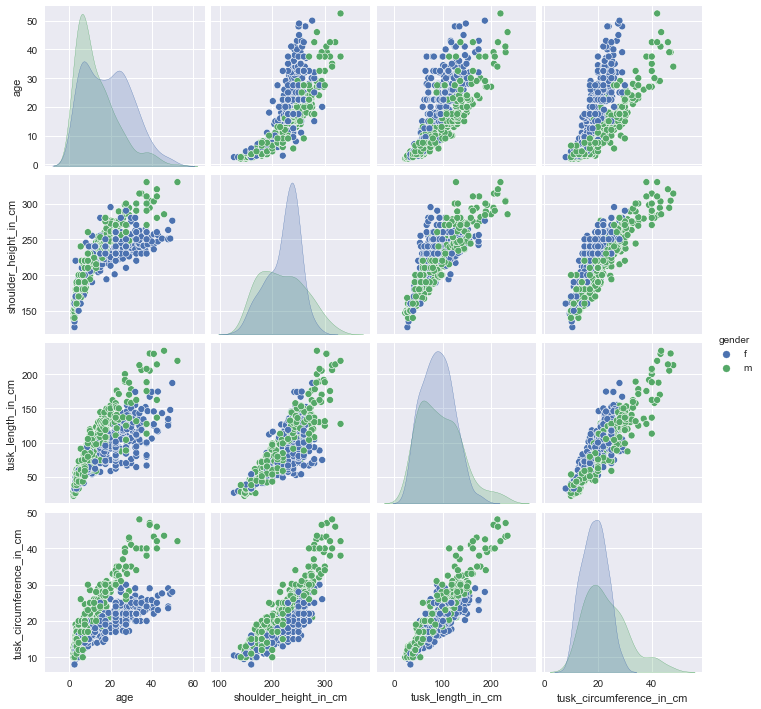

In [268]:
sns.pairplot(df, hue = 'gender')

,age,shoulder_height_in_cm,tusk_length_in_cm,tusk_circumference_in_cm
age,1.000000,0.812112,0.785125,0.684527
shoulder_height_in_cm,0.812112,1.000000,0.832777,0.831982
tusk_length_in_cm,0.785125,0.832777,1.000000,0.871525
tusk_circumference_in_cm,0.684527,0.831982,0.871525,1.000000


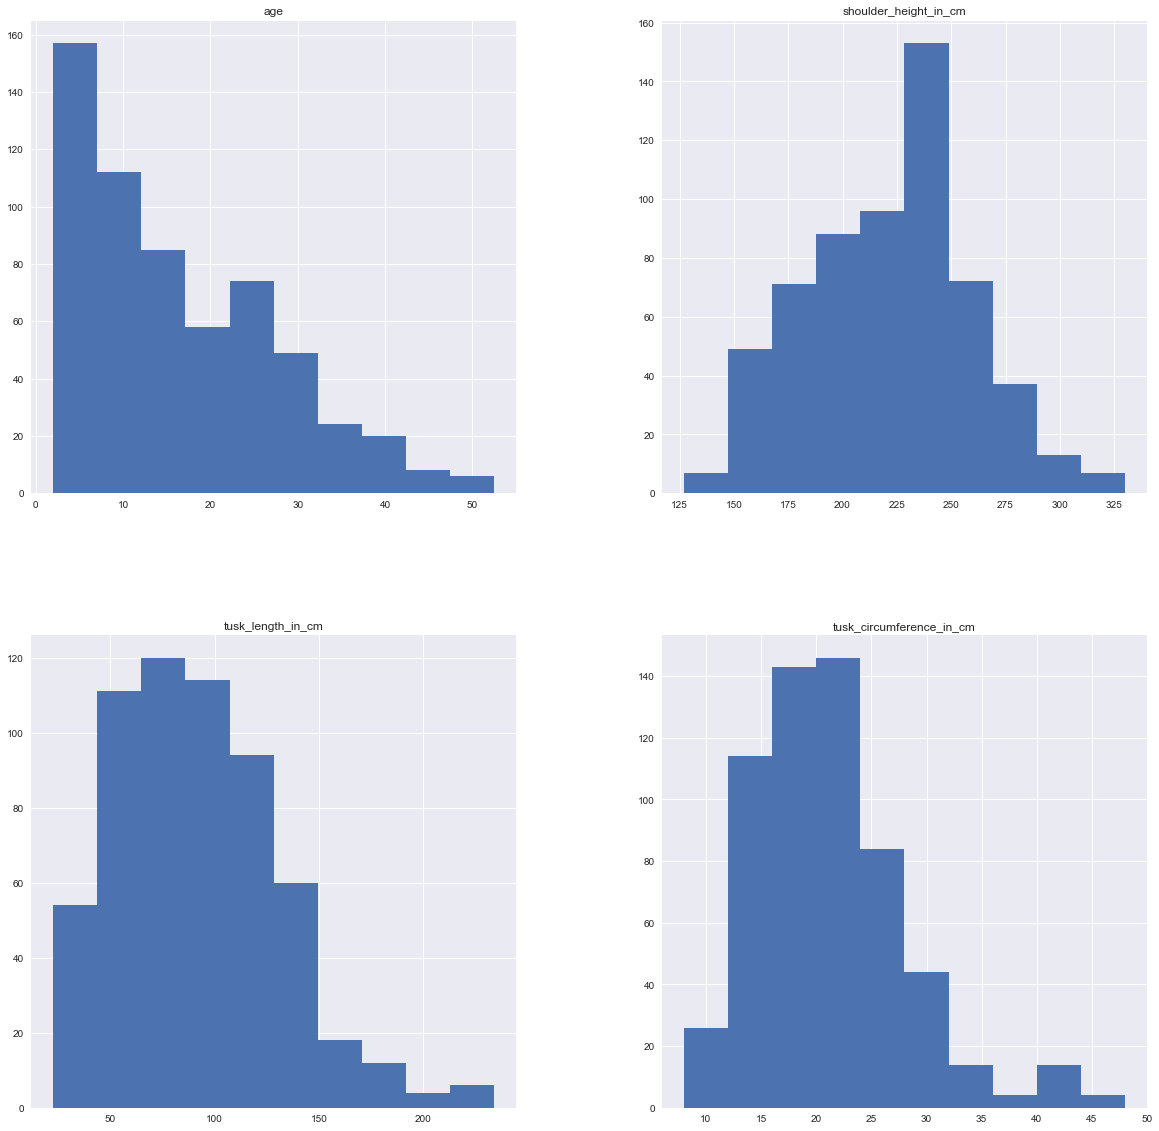

In [269]:
df.hist(figsize = (20,20))
df.corr()

<BarContainer object of 593 artists>

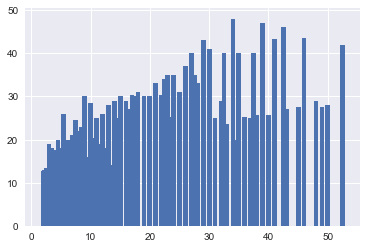

In [270]:
plt.bar(df['age'], df['tusk_circumference_in_cm'])


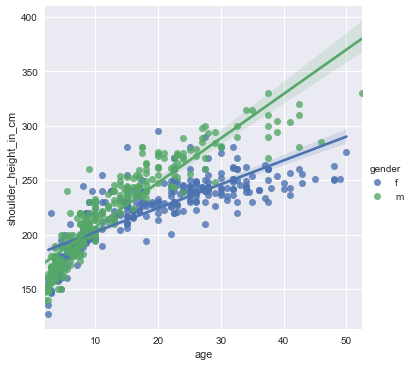

In [271]:
sns.lmplot(data=df, x = 'age', y = 'shoulder_height_in_cm', hue = 'gender')

import python libraries for machine learning

In [272]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [273]:
df.columns = df.columns.to_series().apply(lambda x: x.strip())
df.corr()
#sns.heatmap(df.corr(), annot = True)

,age,shoulder_height_in_cm,tusk_length_in_cm,tusk_circumference_in_cm
age,1.000000,0.812112,0.785125,0.684527
shoulder_height_in_cm,0.812112,1.000000,0.832777,0.831982
tusk_length_in_cm,0.785125,0.832777,1.000000,0.871525
tusk_circumference_in_cm,0.684527,0.831982,0.871525,1.000000


In [274]:
X = df[['tusk_length_in_cm']] 
y = df['age']

In [275]:
reg = LinearRegression().fit(X, y)
reg.predict([[100]])

array([18.0061581])

In [276]:
reg.score(X, y)

0.6164216165117562

Improve prediction score by adding additional columns

In [277]:
X = df[['tusk_length_in_cm','shoulder_height_in_cm', 'tusk_circumference_in_cm']] 
y = df['age']

In [278]:
reg = LinearRegression().fit(X, y)
reg.predict([[100, 200, 20]])

array([13.96321566])

In [279]:
reg.score(X, y)

0.7127853000475114

Seek to further improve prediction score by adding categorical and other columns

In [280]:
X = df[['tusk_length_in_cm','shoulder_height_in_cm', 'tusk_circumference_in_cm', 'gender']] 
X = pd.get_dummies(data=X, drop_first=True)
y = df['age']

In [281]:
reg = LinearRegression().fit(X, y)

In [302]:
round(reg.predict([[100, 210, 21, 0]])[0])

20

In [303]:
reg.score(X, y)

0.783250737857546

# see week 10 class for creating a user defined function 28:32

In [313]:
def age(tusk_len, sh_h, tusk_circum, gender):
    """ 
    user defined function to predict age. Requires tusk_length_in_cm,
    shoulder_height_in_cm, tusk_circumference_in_cm, gender: 1 = male, 0 = female
    """
    return round(reg.predict([[tusk_len, sh_h, tusk_circum, gender]])[0])
   

In [314]:
age(100, 210, 21, 0)

20

Evaluating using testing

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred)**0.5

5.113890164405018

In [287]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
# Set seed for reproducibility
SEED = 1
# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=SEED)

In [288]:
# Instantiate a random forests regressor 'rf' 400 estimators
rf = RandomForestRegressor(n_estimators=400, min_samples_leaf=0.12, random_state=SEED)
# Fit 'rf' to the training set
rf.fit(X_train, y_train)
# Predict the test set labels 'y_pred'
y_pred = rf.predict(X_test)

In [289]:
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)
# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 6.02


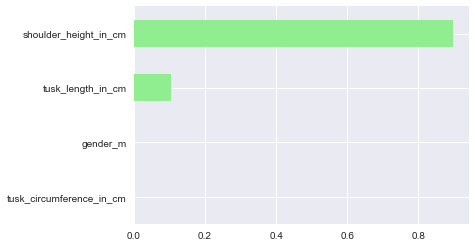

In [290]:

# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_, index = X.columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='lightgreen'); plt.show()

Shoulder height and tusk length are the most important features according to rf. The importances of these two features add up to more than 90%!

# TODAY

In [219]:
# Analysis
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')


# Models
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Metrics evaluation 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

import warnings
warnings.filterwarnings('ignore') #ignore warnings

%matplotlib inline

In [230]:
feature_names = ['tusk_length_in_cm','shoulder_height_in_cm', 'tusk_circumference_in_cm']

# Select data corresponding to features in feature_names
X = df[feature_names]

In [231]:
X.describe()

,tusk_length_in_cm,shoulder_height_in_cm,tusk_circumference_in_cm
count,593.000000,593.000000,593.000000
mean,91.815195,220.659359,20.717707
std,38.793294,37.624011,6.798112
min,22.500000,127.000000,8.000000
25%,61.000000,191.000000,16.000000
50%,88.600000,226.000000,20.000000
75%,117.000000,245.000000,24.000000
max,234.000000,330.000000,48.000000


In [232]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.25, random_state=1)

In [233]:
y = df['age']

In [234]:
y.describe()

count    593.000000
mean      16.166526
std       11.105557
min        2.000000
25%        7.000000
50%       14.500000
75%       24.000000
max       52.500000
Name: age, dtype: float64

In [235]:
# from _ import _
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

#specify the model. 
#For model reproducibility, set a numeric value for random_state when specifying the model
elephant_model = DecisionTreeRegressor(random_state=1, max_depth =3)
# max_depth =3 (demo)
# Fit iowa_model with the training data.
elephant_model.fit(train_X,train_y)

DecisionTreeRegressor(max_depth=3, random_state=1)

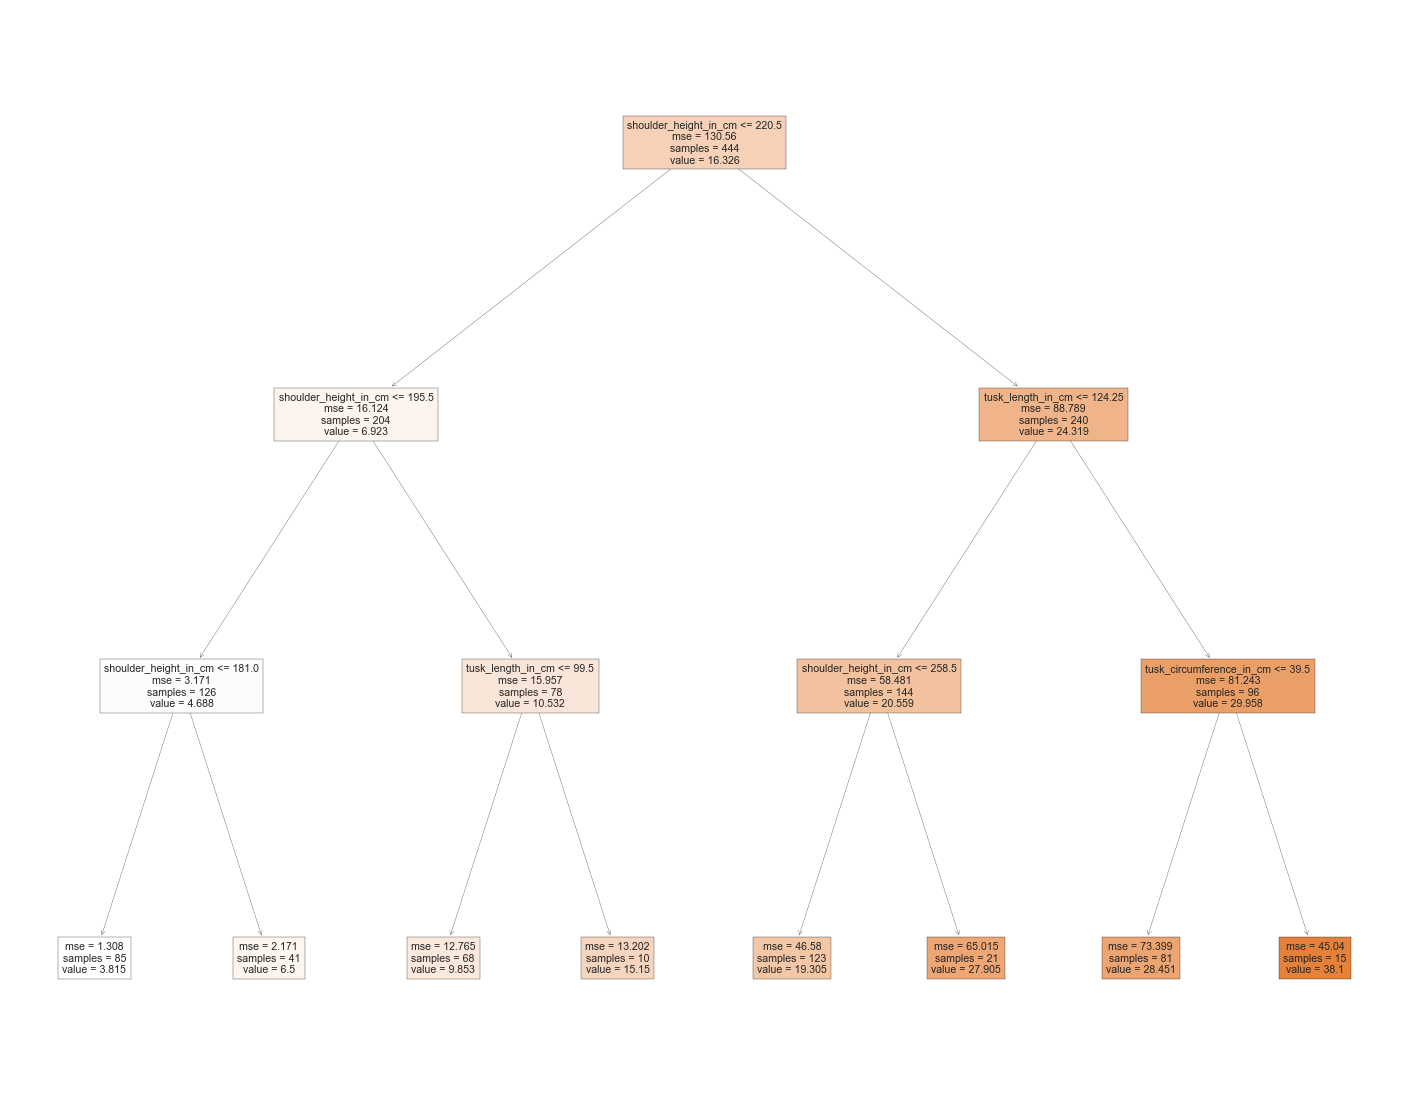

In [236]:
plt.figure(figsize=(25,20))
tree.plot_tree(elephant_model, feature_names=feature_names, filled=True);

In [237]:
val_predictions  = _model.predict(val_X)

In [238]:
print(val_predictions[0:5])
# print the top few actual prices from validation data
print(val_y.head())

[ 9.85294118  3.81470588 28.45061728  3.81470588 27.9047619 ]
702    22.5
515     3.5
565    15.0
681     4.5
639    30.0
Name: age, dtype: float64


In [240]:
comparison_dict = {"actual":val_y.head(), "prediction":val_predictions[0:5]}
comparison_df = pd.DataFrame(comparison_dict)
comparison_df

,actual,prediction
702,22.5,9.852941
515,3.5,3.814706
565,15.0,28.450617
681,4.5,3.814706
639,30.0,27.904762


In [241]:
comparison_df["error"] = abs(comparison_df["actual"] - comparison_df["prediction"] ) 

In [242]:
comparison_df

,actual,prediction,error
702,22.5,9.852941,12.647059
515,3.5,3.814706,0.314706
565,15.0,28.450617,13.450617
681,4.5,3.814706,0.685294
639,30.0,27.904762,2.095238


In [243]:
comparison_df["error"].mean()

5.838582840543625

In [244]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(val_y.head(),val_predictions[0:5]) #for the top 5 outcomes

5.838582840543625

In [245]:
mean_absolute_error(val_predictions, val_y)

4.678457896438921

In [246]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    """
    Function to get the MAE
    """
    model = DecisionTreeRegressor(max_depth=candidate_max_depth, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [254]:
#candidate_max_leaf_nodes = [500,1000,1500,2000,2500]
#candidate_max_leaf_nodes = [1,2,3,4,5]
candidate_max_depths = range(5,25,1)
# Let's find the ideal tree size from candidate_max_leaf_nodes

for candidate_max_depth in candidate_max_depths:
        my_mae = get_mae(candidate_max_depth, train_X, val_X, train_y, val_y)
        print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(candidate_max_depth, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  4
Max leaf nodes: 6  		 Mean Absolute Error:  4
Max leaf nodes: 7  		 Mean Absolute Error:  4
Max leaf nodes: 8  		 Mean Absolute Error:  4
Max leaf nodes: 9  		 Mean Absolute Error:  4
Max leaf nodes: 10  		 Mean Absolute Error:  4
Max leaf nodes: 11  		 Mean Absolute Error:  4
Max leaf nodes: 12  		 Mean Absolute Error:  4
Max leaf nodes: 13  		 Mean Absolute Error:  4
Max leaf nodes: 14  		 Mean Absolute Error:  4
Max leaf nodes: 15  		 Mean Absolute Error:  4
Max leaf nodes: 16  		 Mean Absolute Error:  4
Max leaf nodes: 17  		 Mean Absolute Error:  4
Max leaf nodes: 18  		 Mean Absolute Error:  4
Max leaf nodes: 19  		 Mean Absolute Error:  4
Max leaf nodes: 20  		 Mean Absolute Error:  4
Max leaf nodes: 21  		 Mean Absolute Error:  4
Max leaf nodes: 22  		 Mean Absolute Error:  4
Max leaf nodes: 23  		 Mean Absolute Error:  4
Max leaf nodes: 24  		 Mean Absolute Error:  4
